# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

## 1.Is the distribution of body temperatures normal? 

In [1]:
# Take a look to the distribution

import pandas as pd

#Read the data from CSV file
df = pd.read_csv('data/human_body_temperature.csv')

df.info()
#130 samples
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [2]:
df.describe() 
#sample statistics

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


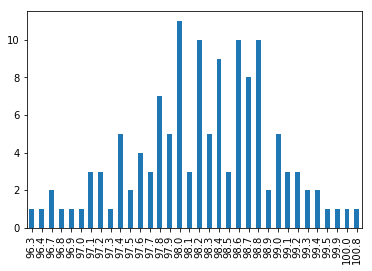

In [3]:
#Is the distribution normal?
#Normality test

%matplotlib inline
import scipy.stats as stats

x = df.temperature

#Plot the distribution
x.value_counts().sort_index().plot(kind='bar')


In [4]:
#A characteristic of the normal distribution is that the mean  (average), median , and mode  are equal.
x.mean(), x.median(), x.mode()

(98.24923076923078, 98.3, 0    98.0
 dtype: float64)

In [5]:
#Compute skewness 

#Skewness is the measure of the asymmetry of a histogram (frequency distribution). 
#A histogram with normal distribution is symmetrical. In other words, the same amount of data falls on both sides of the mean. 
#****A normal distribution  will have a skewness of 0.**** 
#The larger the number, the longer the tail. 
#If skewness is positive, the tail on the right side of the distribution will be longer. 
#If skewness is negative, the tail on the left side will be longer

x.skew() 

-0.0044191311689957711

In [6]:
#Compute kurtosis

#Kurtosis is a measure of the combined weight of the tails in relation to the rest of the distribution. 
#As the tails of a distribution become heavier, the kurtosis value will increase. 
#As the tails become lighter the kurtosis value will decrease. 
#****A histogram with a normal distribution has a kurtosis of 0.**** 
x.kurtosis()

0.78045739503373746

In [7]:
#This function tests the null hypothesis that a sample comes from a normal distribution. 
#It is based on D’Agostino and Pearson’s method
stats.normaltest(x) 

#Note: 
#normaltest returns a 2-tuple of the chi-squared statistic, and the associated p-value. 
#Given the null hypothesis that x came from a normal distribution, the p-value represents the probability that 
#a chi-squared statistic that large (or larger) would be seen.

#Our p-value > 0.05 so we have good evidence to not reject the null-hypothesis.

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

In [8]:
stats.t.fit(x)

(10.383447984151202, 98.256435405221964, 0.65710385265929716)

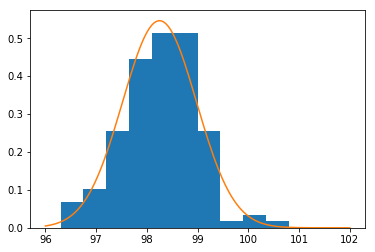

In [10]:
from scipy import stats  
import numpy as np  
import matplotlib.pylab as plt


# plot normed histogram and compare with normal distribution
plt.hist(x, normed=True)

# find minimum and maximum of xticks, so we know
# where we should compute theoretical distribution
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(x))

# lets try the normal distribution first
m, s = stats.norm.fit(x) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it


plt.show()  

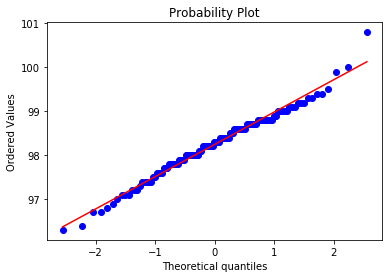

In [12]:
#Use probplot to evaluate in our sample follows a normal distribution or not

import pylab 
stats.probplot(x, dist="norm", plot=pylab)
pylab.show()

**It is not 'strictly' a normal distribution but it is close**

## 2. Is the sample size large? Are the observations independent? 

It is known that with a sample size of at least 30, 
the CLT holds (i.e. the distribution of the sample mean is approximately normally distributed).
In our case, the sample size = 130 >> 30, therefore we can consider that the sample size is large enough.
Temperature meaurements are taken from different individuals at differetn times,
so we can assume that they are independent.

## 3. Is the true population mean really 98.6 degrees F?                      
                                                                           
    -Would you use a one-sample or two-sample test? Why?                   
    -In this situation, is it appropriate to use the tt or zz statistic?   
    -Now try using the other test. How is the result be different? Why?                                                                                


The sample mean 98.2492 may suggest that the true population mean differs from 98.6.

In [13]:
temperature = df.temperature
sample_mean = temperature.mean()
sample_std = temperature.std()
sample_mean, sample_std

(98.24923076923078, 0.7331831580389454)

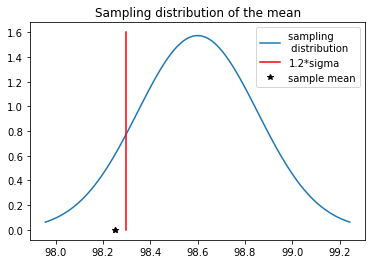

In [17]:
#CLT: The sampling distribution of the population mean will be approximatelly normally distributed 
#with mean = population_mean = 98.6 and and std = sampling_std / sqrt(N)


import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

mu = 98.6
variance = sample_std / math.sqrt(130)
sigma = math.sqrt(variance)
x = np.linspace(mu-10*variance,mu+10*variance, 100)
p1, = plt.plot(x,mlab.normpdf(x, mu, sigma))

p2, = plt.plot([mu-1.2 * sigma, mu - 1.2 * sigma],[0, 1.6],'r-')
p3, = plt.plot([sample_mean, sample_mean],[0, 0],'k*')

plt.legend([p1,p2,p3],['sampling \n distribution', '1.2*sigma', 'sample mean'])

plt.title('Sampling distribution of the mean')

plt.show()


A **one-tailed** test will test either if the mean is significanlty greather than the hypothesis of
or if the mean is significantly lower than the hypothesis mean, but not both.
A **two-tailed** test will test both if the mean is significanlty greather or lower than the hypothesized mean
**Since we want to check wether the true mean = 98.6 or not (it could be lower or higher), 
it is more appropriate to use a two-sided test.**

The **z-test** is used when the std of the population is known, or when n > 30.
In this problem we don't know the std of our population, but, we have n > 30. Therefore
we can use the z-test.
However, **when n >> 30, the t-distribution and the z-distribution are very similar.**
Therefore, both tests should provide similar results.

In [18]:
#Results using the z-test
z = (sample_mean - 98.6)/(sample_std/math.sqrt(130))
z

-5.454823292364079

Let's set the alpha level = 0.05.

Since this is a two-sided test, split the alpha into two 0.05/2 = 0.025
The z-score associated with alpha level = 0.025 is 1.96.
If our z-score is lower than -1.96 or higher than 1.96 then reject the null hypothesis.

**In our case, the z-score = -5.4548 < -1.96, therefore we can reject the null hypothesis**

As expected, similar results are obtained using the t-test

In [20]:
#Result using the t-test
t = (sample_mean - 98.6)/(sample_std/math.sqrt(130))
t
#the probability associated to this t-score is less than 0.0005*2 = 0.001 < 0.05 
#--> therefore we can reject the null hypothesis

-5.454823292364079

As mentioned before, when n > 30 the t-distribution and the z-distribution are very similar, 
and therefore, the the results using the z and t tests are very similar.

## 4. At what temperature should we consider someone's temperature to be "abnormal"?
- Start by computing the margin of error and confidence interval. 

In [25]:
#Margin of error for a 95% confidence
#z-value = 1.65
z = 1.65
margin_error = z*sample_std/math.sqrt(130)
margin_error

0.10610228778252015

In [26]:
#95% confidence interval 
[sample_mean - abs(margin_error), sample_mean + abs(margin_error)]

[98.14312848144826, 98.3553330570133]

In [27]:
#We can consider that someones temperature is abnormal if it, for example, lower or higher than 2*margin_error
abnormal_temperature_low = sample_mean - 2*abs(margin_error)
abnormal_temperature_high = sample_mean + 2*abs(margin_error)
abnormal_temperature_low, abnormal_temperature_high

(98.03702619366574, 98.46143534479582)

## 5. Is there a significant difference between males and females in normal temperature?

-  What test did you use and why?
-  Write a story with your conclusion in the context of the original problem. 

In [31]:
#Read the data from CSV file
df = pd.read_csv('data/human_body_temperature.csv')

temperature_females = df[df.gender == 'F'].temperature
#temperature_females

temperature_males = df[df.gender == 'M'].temperature
#temperature_males

In [33]:
len(temperature_females), len(temperature_males)

(65, 65)

In [35]:
#Since the sample size of both samples is large (>30), we can use the z-test to analyze the the difference of two means
z_num = (temperature_females.mean()- temperature_males.mean())
s_females = temperature_females.std()
s_males = temperature_males.std()
z_den = math.sqrt(math.pow(s_females,2)/len(temperature_females) + math.pow(s_males,2)/len(temperature_males))

z = z_num/z_den
z

2.285434538165274

Set alpha level = 0.05

Since this is a two-sided test, split the alpha into two 0.05/2 = 0.025.
The z-score associated with alpha level = 0.025 is 1.96.
If our z-score = 2.28 is higher than 1.96 we could reject the null hypothesis.

However, the z-score in this case is closer to the critical value, thus the result is more debatable that in exercise 1.

It commonly accepted that the average body temperature of healthy adults is 98.6°F.
The objetive of this analysis is to assess whether this hypotheis is true or not using 
a random sample taken from healthy adults. 
The average temperature of the sample is found to be 98.2°F, which may indicate that
the true population mean is different from 98.6°F.
The statistical evidence (hypothesis testing result) indicates that the average temperature of healthy adults
is different from 98.6°F (assuming that our sample is representative and no biased due to an unexpected event).

Regarding the temperature for men and women, our results may indicate that there is a significative difference between
the mean temperature of both populations.
